# Liver Cirhosis Risk Prediction/Classification

In [398]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, mean_squared_error, roc_auc_score
from sklearn.naive_bayes import GaussianNB

## Data Preprocessing

In [340]:
#Load
cir_df = pd.read_csv("cirrhosis.csv")

In [341]:
cir_df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [342]:
cir_df.shape

(418, 20)

In [343]:
cir_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [344]:
cir_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,418.0,209.500000,120.810458,1.00,105.2500,209.50,313.75,418.00
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00


In [345]:
cir_df.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [346]:
cir_df[cir_df["Drug"].isna()].head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
312,313,4062,C,NaN,21915,F,NaN,NaN,NaN,N,0.7,NaN,3.65,NaN,NaN,NaN,NaN,378.0,11.0,NaN
313,314,3561,D,NaN,23741,F,NaN,NaN,NaN,S,1.4,NaN,3.04,NaN,NaN,NaN,NaN,331.0,12.1,4.0
314,315,2844,C,NaN,19724,F,NaN,NaN,NaN,N,0.7,NaN,4.03,NaN,NaN,NaN,NaN,226.0,9.8,4.0
315,316,2071,D,NaN,27394,F,NaN,NaN,NaN,S,0.7,NaN,3.96,NaN,NaN,NaN,NaN,NaN,11.3,4.0
316,317,3030,C,NaN,22646,F,NaN,NaN,NaN,N,0.8,NaN,2.48,NaN,NaN,NaN,NaN,273.0,10.0,NaN


In [347]:
# Drop rows with too many null values, as well as ID column
cir_df = cir_df[cir_df["Drug"].isna() == False]
cir_df.drop(columns= ['ID'], inplace= True)

cir_df.isna().sum()

N_Days            0
Status            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            2
Alk_Phos          0
SGOT              0
Tryglicerides    30
Platelets         4
Prothrombin       0
Stage             0
dtype: int64

In [348]:
#Impute numerical null values with median
cir_df["Cholesterol"].fillna(cir_df["Cholesterol"].median(), inplace=True)
cir_df["Tryglicerides"].fillna(cir_df["Tryglicerides"].median(), inplace=True)
cir_df["Platelets"].fillna(cir_df["Platelets"].median(), inplace=True)
cir_df["Copper"].fillna(cir_df["Copper"].median(), inplace=True)
cir_df["Age"] = (cir_df["Age"]/365)
cir_df["Age"] = cir_df["Age"].astype("int64")

cir_df.isna().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

/var/folders/fl/xmsqt32x4rd9htc3rkc5wd0m0000gp/T/ipykernel_33575/3080738137.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cir_df.corr(), annot = True, cmap='RdBu', ax=ax)


Text(0.5, 1.0, 'Correlation Matrix')

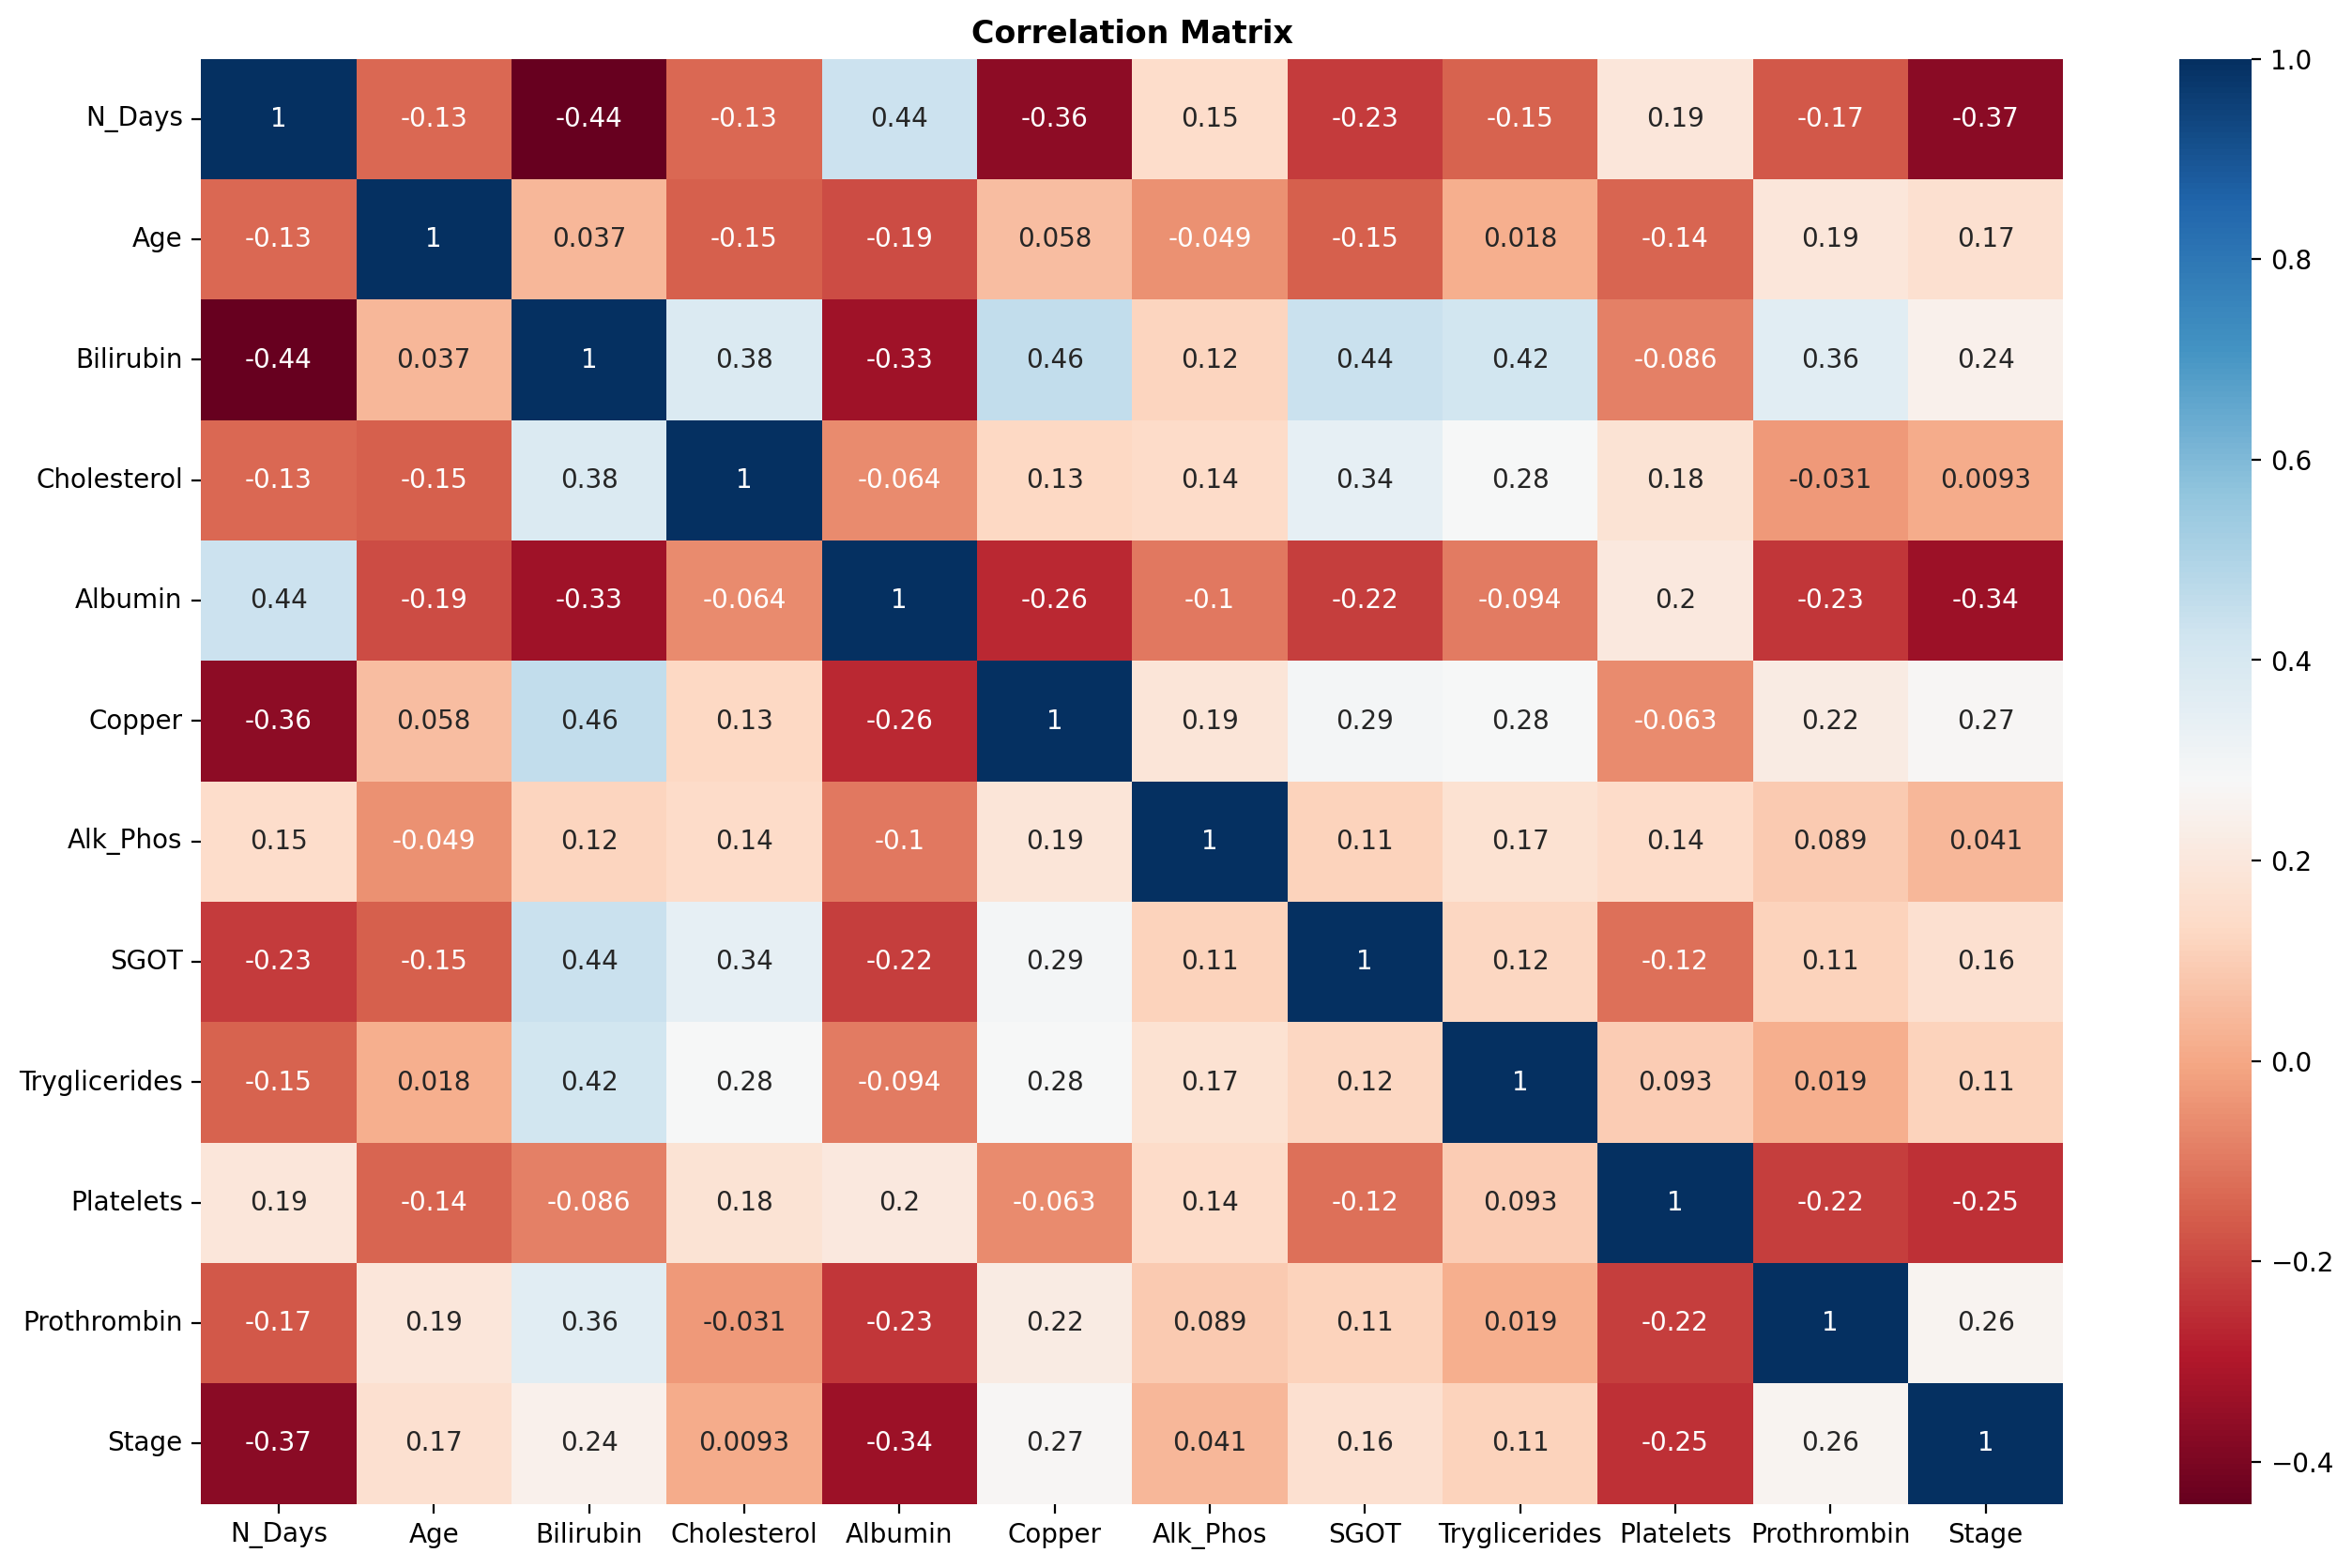

In [349]:
plt.figure(figsize = (16,10), dpi=200)
ax = plt.axes()
sns.heatmap(cir_df.corr(), annot = True, cmap='RdBu', ax=ax)
ax.set_title('Correlation Matrix', weight='bold')

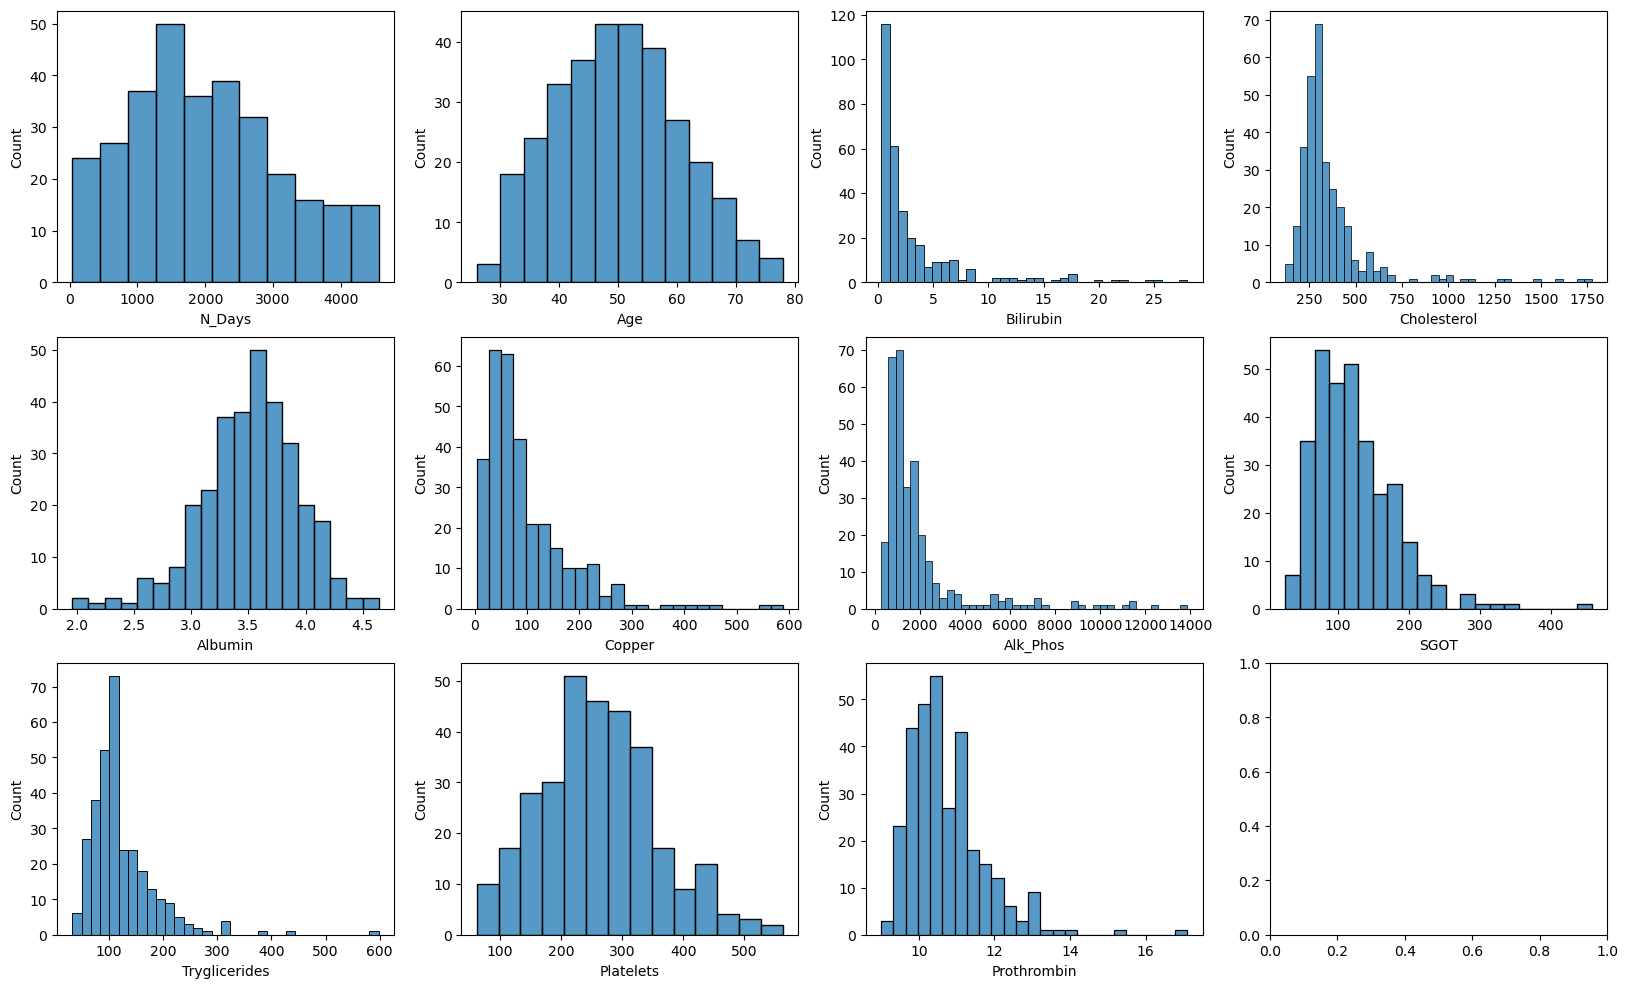

In [350]:
fig, ax = plt.subplots(3, 4, figsize = (20,12))
var = [['N_Days','Age','Bilirubin','Cholesterol'],
       ['Albumin','Copper','Alk_Phos','SGOT'],
       ['Tryglicerides','Platelets','Prothrombin']]
for x in range(3):
    for y in range(4):
        if x == 2 and y == 3:
            break
        else:
            sns.histplot(ax=ax[x,y],x = var[x][y], data = cir_df)

In [351]:
import copy

In [352]:
df = copy.deepcopy(cir_df)

In [353]:
# Dummy variables for categorical values
cir_df['Drug'].replace(['D-penicillamine','Placebo'], [1,0], inplace = True)
cir_df['Sex'].replace(['F','M'], [1,0], inplace = True)
cir_df['Ascites'].replace(['Y','N'], [1,0], inplace = True)
cir_df['Hepatomegaly'].replace(['Y','N'], [1,0], inplace = True)
cir_df['Spiders'].replace(['Y','N'], [1,0], inplace = True)
cir_df['Edema'].replace(['Y','N','S'], [1,0,-1], inplace = True)
cir_df['Status'].replace(['D','C','CL'], [1,0,-1], inplace = True)
out_df = copy.deepcopy(cir_df)
cir_df['Stage'].replace([1,2,3,4], [0,0,0,1], inplace = True)
out_df['Stage'].replace([1,2,3,4], ['S1','S2','S3','S4'], inplace = True)

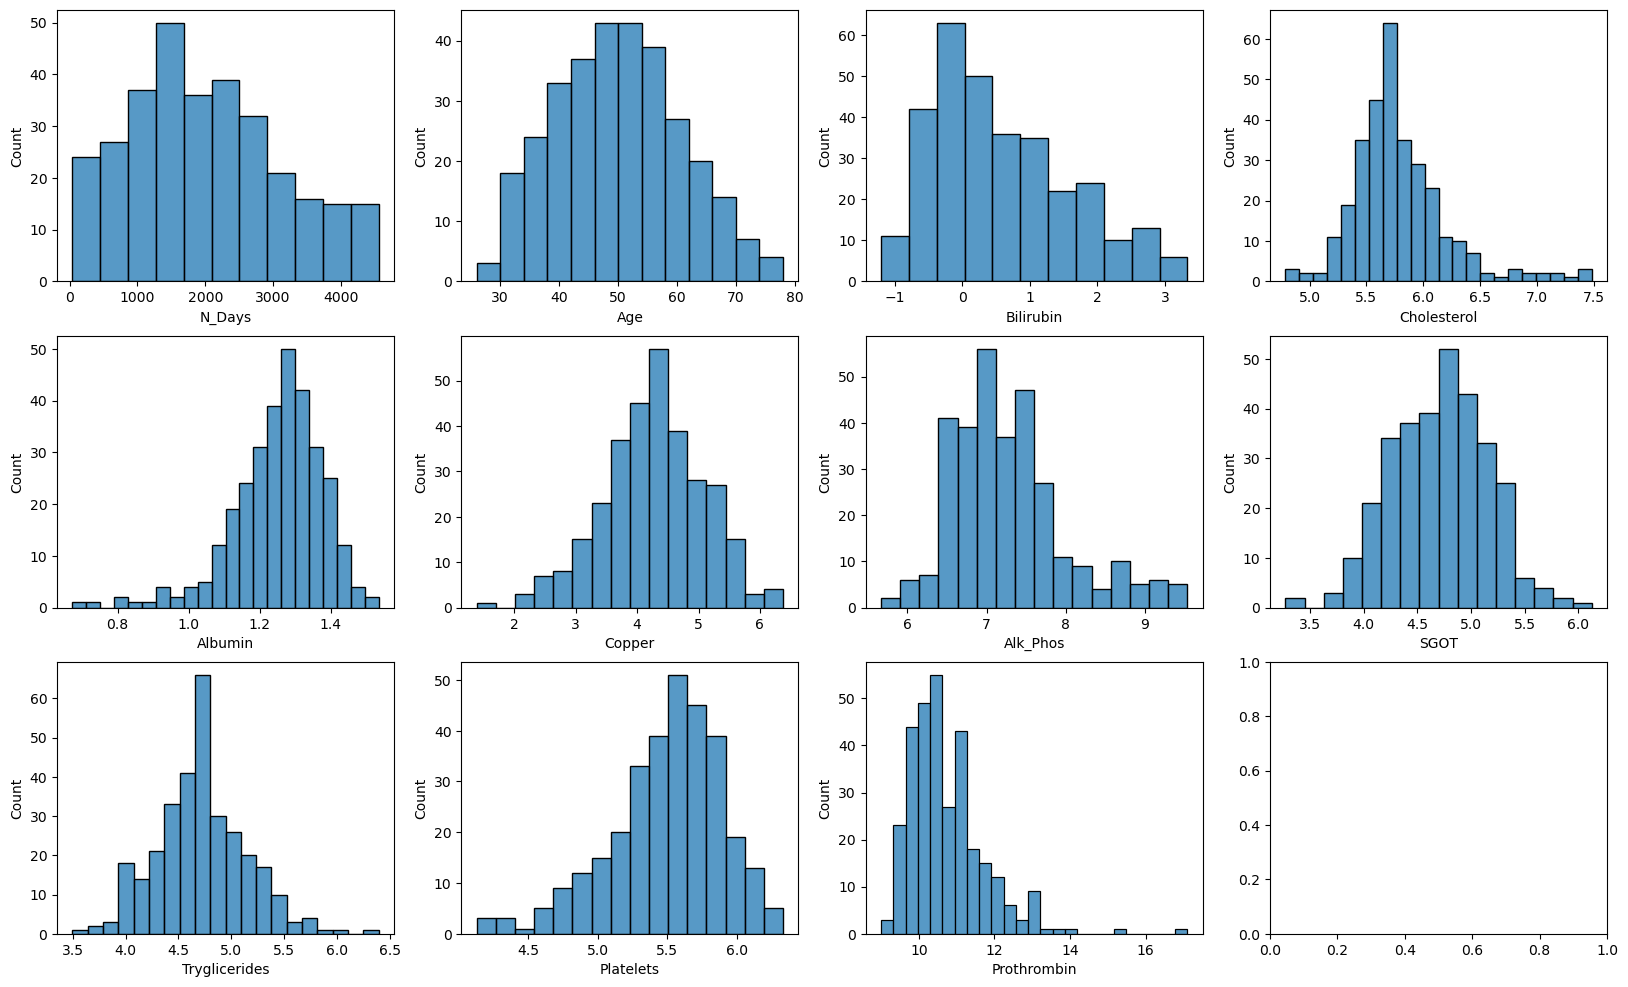

In [354]:
log_df = copy.deepcopy(cir_df)
log_df.iloc[:,9:17] = np.log(log_df.iloc[:,9:17])

fig, ax = plt.subplots(3, 4, figsize = (20,12))
var = [['N_Days','Age','Bilirubin','Cholesterol'],
       ['Albumin','Copper','Alk_Phos','SGOT'],
       ['Tryglicerides','Platelets','Prothrombin']]
for x in range(3):
    for y in range(4):
        if x == 2 and y == 3:
            break
        else:
            sns.histplot(ax=ax[x,y],x = var[x][y], data = log_df)

In [61]:
log_cir_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 311
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         312 non-null    int64  
 1   Status         312 non-null    int64  
 2   Drug           312 non-null    int64  
 3   Age            312 non-null    int64  
 4   Sex            312 non-null    int64  
 5   Ascites        312 non-null    int64  
 6   Hepatomegaly   312 non-null    int64  
 7   Spiders        312 non-null    int64  
 8   Edema          312 non-null    int64  
 9   Bilirubin      312 non-null    float64
 10  Cholesterol    312 non-null    float64
 11  Albumin        312 non-null    float64
 12  Copper         312 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  312 non-null    float64
 16  Platelets      312 non-null    float64
 17  Prothrombin    312 non-null    float64
 18  Stage     

In [355]:
cir_df.drop(['Status', 'N_Days'], axis=1, inplace = True)
out_df.drop(['Status', 'N_Days'], axis=1, inplace = True)
log_df.drop(['Status', 'N_Days'], axis=1, inplace = True)

In [356]:
X = cir_df.drop(['Stage'], axis=1)
y = cir_df.pop('Stage')

In [314]:
X = log_df.drop(['Stage'], axis=1)
y = log_df.pop('Stage')

## EDA

In [3]:
#Check duplicate
len(pd.unique(cir_df["ID"])) == len(cir_df.index)

True

In [7]:
cir_df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

## Model

### Spliting Data

In [357]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X_train=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test=pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

### Naive Bayes Model

In [399]:
# Training the Naive Bayes model on the Training set
NBclassifier = GaussianNB()
NBclassifier.fit(X_train, y_train)

# Predicting the Test set results
nb_pred = NBclassifier.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, nb_pred)))

Model accuracy score: 0.7460


In [427]:
nb_par = {'var_smoothing': (0,1e-9,1e-7, 1e-5, 1e-3), }
# with GridSearch
grid_search_gnb = GridSearchCV(
    estimator=NBclassifier,
    param_grid=nb_par,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)
nbcv=grid_search_gnb.fit(X_train, y_train)
nbcv_pred =nbcv.predict(X_test)
nb_cm = confusion_matrix(nbcv_pred, y_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, nbcv_pred)))

Model accuracy score: 0.7460


#### Check for overfitting and underfitting

In [428]:
print('Training set score: {:.4f}'.format(nbcv.best_estimator_.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(nbcv.best_estimator_.score(X_test, y_test)))

Training set score: 0.7390
Test set score: 0.7460


<Axes: >

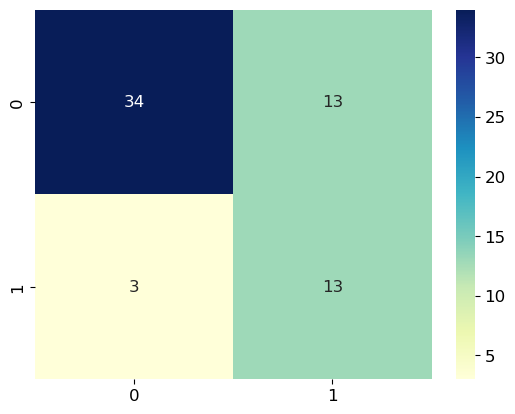

In [429]:
sns.heatmap(nb_cm, annot = True, cmap='YlGnBu')

In [430]:
y_test.value_counts()

0.0    37
1.0    26
Name: Stage, dtype: int64

In [431]:
null_accuracy = 37/(37+26)

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5873


In [432]:
from sklearn.metrics import classification_report

print(f"Classification Report of Naive Bayes Classifier : \n {classification_report(y_test, nbcv_pred)}")

Classification Report of Naive Bayes Classifier : 
               precision    recall  f1-score   support

         0.0       0.72      0.92      0.81        37
         1.0       0.81      0.50      0.62        26

    accuracy                           0.75        63
   macro avg       0.77      0.71      0.71        63
weighted avg       0.76      0.75      0.73        63



In [415]:
nb_pred1 = nbcv.best_estimator_.predict_proba(X_test)[:, 1]

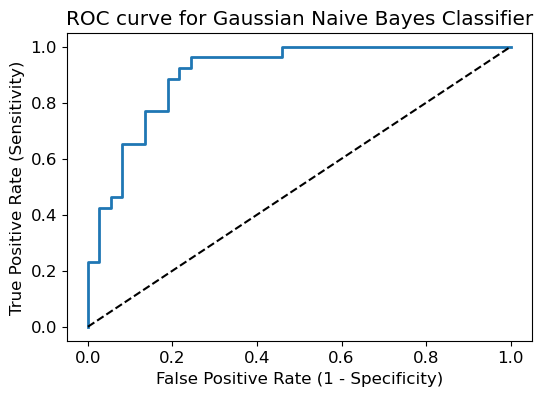

In [416]:
fpr, tpr, thresholds = roc_curve(y_test, nb_pred1, pos_label = 1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [417]:

ROC_AUC = roc_auc_score(y_test, nb_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9044


### Linear Discriminant Analysis

In [362]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
lmodel = LinearDiscriminantAnalysis()
lda = lmodel.fit(X_train, y_train)
lda_pred = lda.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, lda_pred)))

Model accuracy score: 0.7460


In [436]:
lda2 = LinearDiscriminantAnalysis(shrinkage='auto')#note svd does not run with shrinkage and models using it will be tuned separately
lda_par = {
    'solver': ('lsqr','eigen'),
    'n_components': (1,2,1),
                   }
# with GridSearch
grid_search_lda = GridSearchCV(
    estimator=lda2,
    param_grid=lda_par,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)
ldacv=grid_search_lda.fit(X_train, y_train)
ldacv_pred =ldacv.predict(X_test)
lda_cm = confusion_matrix(ldacv_pred, y_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, ldacv_pred)))

Model accuracy score: 0.7778


/Users/Landi/miniconda3/envs/ML-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/Landi/miniconda3/envs/ML-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Landi/miniconda3/envs/ML-env/lib/python3.10/site-packages/sklearn/discriminant_analysis.py", line 608, in fit
    raise ValueError(
ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

  warnings.warn(some_fits_failed_messag

#### Check for overfitting and underfitting

In [434]:
print('Training set score: {:.4f}'.format(ldacv.best_estimator_.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(ldacv.best_estimator_.score(X_test, y_test)))

Training set score: 0.7751
Test set score: 0.7778


<Axes: >

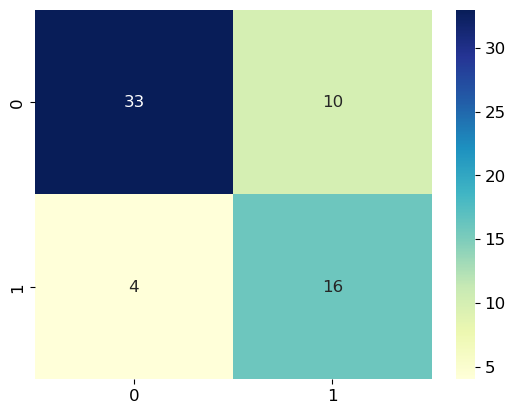

In [437]:
sns.heatmap(lda_cm, annot=True, cmap='YlGnBu')

In [438]:
print(f"Classification Report of Linear Discriminant Analysis : \n {classification_report(y_test, ldacv_pred)}")

Classification Report of Linear Discriminant Analysis : 
               precision    recall  f1-score   support

         0.0       0.77      0.89      0.82        37
         1.0       0.80      0.62      0.70        26

    accuracy                           0.78        63
   macro avg       0.78      0.75      0.76        63
weighted avg       0.78      0.78      0.77        63



In [439]:
lda_pred1 = ldacv.best_estimator_.predict_proba(X_test)[:, 1]

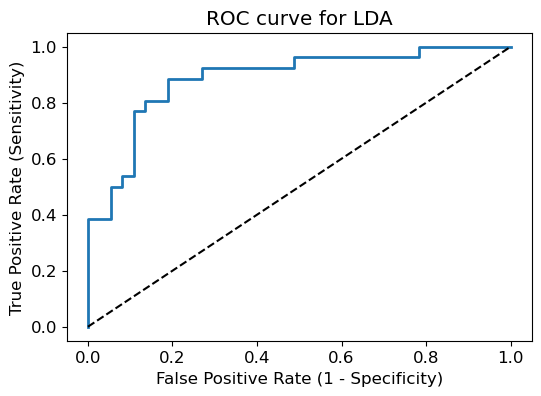

In [440]:
fpr, tpr, thresholds = roc_curve(y_test, lda_pred1, pos_label = 1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for LDA')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [422]:
ROC_AUC = roc_auc_score(y_test, lda_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8867


### Quadratic Discriminant Analysis

In [363]:
qmodel = QuadraticDiscriminantAnalysis()
qda = qmodel.fit(X_train, y_train)
qda_pred = qda.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, qda_pred)))

Model accuracy score: 0.7302


In [441]:
qda2 = QuadraticDiscriminantAnalysis()
qda_par = {
    'reg_param': (0.00001, 0.0001, 0.001,0.01, 0.1), 
    'store_covariance': (True, False),
    'tol': (0.0001, 0.001,0.01, 0.1), 
                   }
# with GridSearch
grid_search_qda = GridSearchCV(
    estimator=qda2,
    param_grid=qda_par,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)
qdacv=grid_search_qda.fit(X_train, y_train)
qdacv_pred =qdacv.predict(X_test)
qda_cm = confusion_matrix(qdacv_pred, y_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, qdacv_pred)))

Model accuracy score: 0.7143


#### Check for overfitting and underfitting

In [442]:
print('Training set score: {:.4f}'.format(qdacv.best_estimator_.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(qdacv.best_estimator_.score(X_test, y_test)))

Training set score: 0.7912
Test set score: 0.7143


<Axes: >

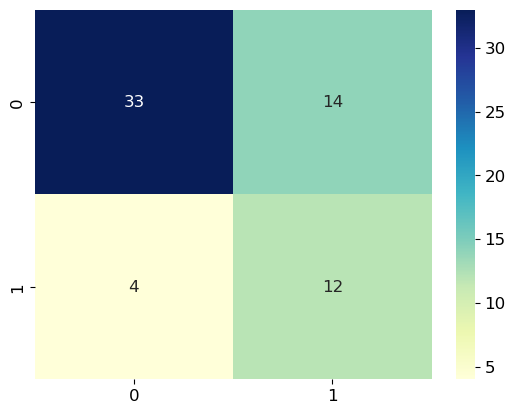

In [443]:
sns.heatmap(qda_cm, annot=True, cmap='YlGnBu')

In [444]:
print(f"Classification Report of Quadratic Discriminant Analysis : \n {classification_report(y_test, qdacv_pred)}")

Classification Report of Quadratic Discriminant Analysis : 
               precision    recall  f1-score   support

         0.0       0.70      0.89      0.79        37
         1.0       0.75      0.46      0.57        26

    accuracy                           0.71        63
   macro avg       0.73      0.68      0.68        63
weighted avg       0.72      0.71      0.70        63



In [445]:
qda_pred1 = qdacv.best_estimator_.predict_proba(X_test)[:, 1]

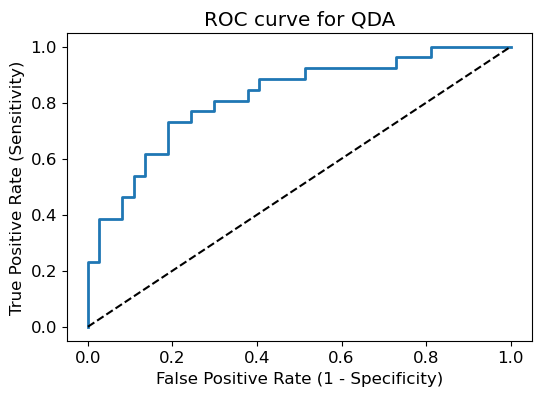

In [446]:
fpr, tpr, thresholds = roc_curve(y_test, qda_pred1, pos_label = 1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for QDA')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [447]:
ROC_AUC = roc_auc_score(y_test, qda_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8191


### Proportional Odds Model

In [9]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
#Or use R

In [18]:
cir_df["Stage"] = cir_df["Stage"].astype("category")

### Multilayer Perceptron Neural Network

In [ ]:
#Need one-hot encoding for Endema

$N_h = \frac{N_s}{\alpha  (N_i+N_o)}$

### XGBoost

## Performance Evaluation